<img src="dbpedia_getting_started.jpg">

# Experimental area for interacting with Parthenos Discovery platform

Data notebooks are increasingly popular, as they offer "in browser code execution" and easy sharing and reproducing of algorithmis procedures.
In the context of Parthenos Discovery, the Juypter notebooks provide more freedom as to postprocessing of the resulting data. For querying the data we use [SPARQL](https://www.w3.org/TR/sparql11-query/). https://parthenos.acdh-dev.oeaw.ac.at/


Credits:
Based on [notebooks from gastrodon](https://github.com/paulhoule/gastrodon/blob/master/notebooks/remote/Querying%20DBpedia.ipynb)
"My method is a deliberate combination of systematic analysis (looking at counts, methods that can applied to arbitrary predicates or classes) and opportunism (looking at topics that catch my eye.)"


In [3]:
import sys
from os.path import expanduser
from gastrodon import RemoteEndpoint,QName,ttl,URIRef,inline
import pandas as pd
import json
pd.options.display.width=120
pd.options.display.max_colwidth=100



First let's define a few prefixes for namespaces we will use:

In [4]:
prefixes=inline("""
    @prefix : <http://dbpedia.org/resource/> .
    @prefix pe: <http://parthenos.d4science.org/CRMext/CRMpe.rdfs/> .
    @prefix crm: <http://www.cidoc-crm.org/cidoc-crm/> .
    @prefix crmdig: <http://www.ics.forth.gr/isl/CRMext/CRMdig.rdfs/> .
""").graph

Next we set up a SPARQL endpoint and register the above prefixes so I can use them;  it is also important that I set the default graph and base_uri so we'll get good looking short results.

In [5]:
connection_data=json.load(open(expanduser("config.json")))
connection_data["prefixes"]=prefixes
endpoint=RemoteEndpoint(**connection_data)

In [6]:
endpoint=RemoteEndpoint(
    "https://triplestore.acdh-dev.oeaw.ac.at/parthenos-dev/sparql"
    ,default_graph=""
    ,prefixes=prefixes
    ,base_uri="http://dbpedia.org/resource/"
)

## Counting Triples

First I count how many triples there are in the main graph

In [7]:
count=endpoint.select("""
    SELECT (COUNT(*) AS ?count) { ?s ?p ?o .}
""").at[0,"count"]
count

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



Unauthorized: Unauthorized: access is denied due to invalid credentials (unauthorized). Check the credentials.

## Counting Predicates

A list of predicates and their frequency.

In [24]:
predicates=endpoint.select("""
    SELECT ?p (COUNT(*) AS ?count) { ?s ?p ?o .} GROUP BY ?p ORDER BY DESC(?count)
""")
predicates

,count
p,
rdf:type,14831157
rdfs:label,12232917
crm:P2_has_type,3402228
crm:P1_is_identified_by,1612482
crm:P3_has_note,1299140
crm:P129_is_about,995678
http://www.d-net.research-infrastructures.eu/provenance/transformedInDate,801562
crm:P02_has_range,715927
crm:P14.1_in_the_role_of,712898


In [25]:
endpoint.select("""
    SELECT (COUNT(*) AS ?count) { SELECT DISTINCT ?p { ?s ?p ?o .} }
""")

,count
0,127


When you have a number of "things" ordered by how prevalent there are,  a cumulative distribution function is a great nonparametric method of characterizing the statistics

In [26]:
predicates["dist"]=predicates["count"].cumsum()/count

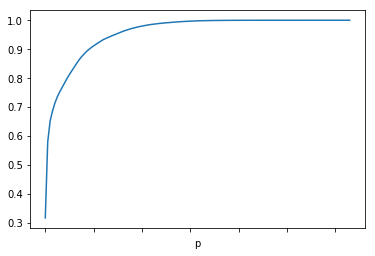

In [27]:
%matplotlib inline
predicates["dist"].plot()

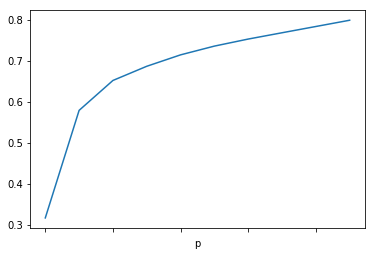

In [29]:
predicates["dist"].head(10).plot()

Here ff the top 20 predicates,  representing more than 80% of the predicates used in the main graph

In [10]:
predicates.head(30)

,count,dist
p,,
rdf:type,113715893,0.259426
http://www.w3.org/2002/07/owl#sameAs,33623696,0.336134
http://purl.org/dc/terms/subject,23990506,0.390864
rdfs:label,22430852,0.442037
http://www.w3.org/ns/prov#wasDerivedFrom,15801285,0.478085
on:wikiPageID,15797811,0.514126
on:wikiPageRevisionID,15797811,0.550166
http://purl.org/dc/elements/1.1/language,12845235,0.579471
http://xmlns.com/foaf/0.1/primaryTopic,12845235,0.608775


time: 9.5 ms


Looking at the tail,  I find some very random sorts of properties.

In [30]:
predicates.tail()

,count,dist
p,,
http://purl.org/dc/terms/description,2,1.0
http://purl.org/dc/terms/title,2,1.0
pe:PP31_uses_curation_plan,2,1.0
rdfs:seeAlso,1,1.0
http://www.w3.org/2002/07/owl#unionOf,1,1.0


# Classes

In [32]:
types=endpoint.select("""
    SELECT ?type (COUNT(*) AS ?count) { ?s a ?type .} GROUP BY ?type ORDER BY DESC(?count)
""")
types

,count
type,
crm:E55_Type,3708891
crm:E42_Identifier,792528
crm:E52_Time-Span,767167
crm:E39_Actor,760907
crm:PC14_carried_out_by,710083
crm:E35_Title,647214
crmdig:D7_Digital_Machine_Event,556509
pe:PE22_Persistent_Dataset,550654
pe:PE24_Volatile_Dataset,507767


In [15]:
endpoint.select("""
    SELECT (COUNT(*) AS ?count) { SELECT DISTINCT ?type { ?s a ?type .} }
""")

,count
0,80


In [33]:
types[types.index.str.startswith('crm:')]

,count
type,
crm:E55_Type,3708891
crm:E42_Identifier,792528
crm:E52_Time-Span,767167
crm:E39_Actor,760907
crm:PC14_carried_out_by,710083
crm:E35_Title,647214
crm:E33_Linguistic_Object,406172
crm:E73_Information_Object,371244
crm:E65_Creation,342374


Let's have a look at instances of one class, say **crm:E38_Image**:

In [38]:
endpoint.select("""
    SELECT ?that { 
        ?that a crm:E38_Image
    } LIMIT 10
""")

,that
0,http://194.242.241.163/fedora/objects/coll:91/datastreams/MM258501/content
1,http://194.242.241.163/fedora/objects/coll:719/datastreams/MM246504/content
2,http://194.242.241.163/fedora/objects/coll:598/datastreams/MM285984/content
3,http://194.242.241.163/fedora/objects/coll:930/datastreams/MM288866/content
4,http://194.242.241.163/fedora/objects/coll:159/datastreams/MM195428/content
5,http://194.242.241.163/fedora/objects/coll:355/datastreams/MM116879/content
6,http://194.242.241.163/fedora/objects/coll:888/datastreams/MM272362/content
7,http://194.242.241.163/fedora/objects/coll:840/datastreams/MM251766/content
8,http://194.242.241.163/fedora/objects/coll:685/datastreams/MM245140/content
9,http://194.242.241.163/fedora/objects/coll:713/datastreams/MM246144/content


In [36]:
#from bs4 import BeautifulSoup
from IPython.display import display, HTML
#from uritools import urijoin

HTML('<img src="{0}">'.format(_.at[0,'that']))

Now I want to use a value from one result in the next query. (gastrodon library "lets you use Python variables in your SPARQL queries simply by adding ?_ to the name of your variables")

In [58]:
actors = endpoint.select("""
    SELECT ?actor { 
        ?actor a crm:E39_Actor.
        ?actor rdfs:label ?label.
    } LIMIT 10
""")
actor1 = actors.at[0,'actor']

actor1_properties = endpoint.select("""
    SELECT ?p ?o { 
        ?_actor1 ?p ?o.
    } LIMIT 10
""")
actor1_properties



,p,o
0,rdf:type,crm:E39_Actor
1,rdfs:label,"Bergman, W."
